<a href="https://colab.research.google.com/github/andreidore/aicrowd_practice/blob/master/tmpmn-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error
import xgboost



In [2]:
!rm -rf data
!mkdir data
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/tmpmn/v0.1/test.csv
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/tmpmn/v0.1/train.csv
!mv train.csv data/train.csv
!mv test.csv data/test.csv

--2020-05-20 16:52:26--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/tmpmn/v0.1/test.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.13, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13261 (13K) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>]  12.95K  56.5KB/s    in 0.2s    

2020-05-20 16:52:27 (56.5 KB/s) - ‘test.csv’ saved [13261/13261]

--2020-05-20 16:52:28--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/tmpmn/v0.1/train.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.13, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 2

In [0]:
all_data_path = "data/train.csv" #path where data is stored

In [217]:
all_data = pd.read_csv(all_data_path)
all_data.head()

,Max_temperature,Min_temperature,Dewpoint,Precipitation,Sea_level_pressure,Standard_pressure,Visibility,Wind_speed,Max_wind_speed,Mean_temperature
0,86.5,57.6,56.5,0.0,29.93,7.4,7.48,13.8,34.28,72.4
1,55.6,37.4,36.1,0.0,30.30,7.5,12.70,20.8,34.28,46.6
2,85.6,62.4,52.8,0.0,29.94,7.4,10.40,16.1,34.28,74.3
3,75.2,53.6,46.9,0.0,29.93,7.3,19.70,25.3,34.28,62.8
4,60.8,34.0,41.9,0.0,30.04,6.4,9.09,16.1,34.28,49.9


In [105]:
all_data.describe()

,Max_temperature,Min_temperature,Dewpoint,Precipitation,Sea_level_pressure,Standard_pressure,Visibility,Wind_speed,Max_wind_speed,Mean_temperature
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,72.569692,51.030308,46.721421,0.098596,29.967611,7.195976,11.240265,19.905402,34.294033,61.847774
std,16.026870,13.157508,9.303466,0.375938,0.166530,0.684027,5.379394,6.942334,2.435109,14.444963
min,36.700000,15.800000,13.600000,0.000000,29.260000,2.500000,0.920000,4.720000,16.110000,29.400000
25%,59.000000,40.950000,41.400000,0.000000,29.850000,7.100000,6.670000,16.100000,34.280000,49.775000
50%,71.600000,50.600000,48.400000,0.000000,29.950000,7.300000,10.800000,20.800000,34.280000,60.750000
75%,87.800000,62.250000,53.700000,0.000000,30.070000,7.600000,15.500000,23.000000,34.280000,75.700000
max,105.000000,78.400000,64.400000,7.600000,30.480000,10.100000,29.100000,64.300000,55.240000,89.000000


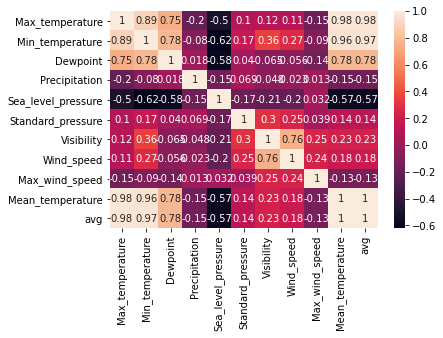

In [313]:
sns.heatmap(all_data.corr(), annot = True)

In [314]:
all_data.drop("Mean_temperature", axis=1).apply(lambda x: x.corr(all_data["Mean_temperature"]))

Max_temperature       0.978845
Min_temperature       0.957402
Dewpoint              0.781420
Precipitation        -0.152560
Sea_level_pressure   -0.574501
Standard_pressure     0.137732
Visibility            0.226826
Wind_speed            0.184264
Max_wind_speed       -0.133136
avg                   0.995573
dtype: float64

In [47]:
all_data.columns

Index(['Max_temperature', 'Min_temperature', 'Dewpoint', 'Precipitation',
       'Sea_level_pressure', 'Standard_pressure', 'Visibility', 'Wind_speed',
       'Max_wind_speed', 'Mean_temperature'],
      dtype='object')

In [304]:
all_data['avg'] = all_data[['Max_temperature', 'Min_temperature']].mean(axis=1)
all_data.head()

,Max_temperature,Min_temperature,Dewpoint,Precipitation,Sea_level_pressure,Standard_pressure,Visibility,Wind_speed,Max_wind_speed,Mean_temperature,avg
0,86.5,57.6,56.5,0.0,29.93,7.4,7.48,13.8,34.28,72.4,72.05
1,55.6,37.4,36.1,0.0,30.30,7.5,12.70,20.8,34.28,46.6,46.50
2,85.6,62.4,52.8,0.0,29.94,7.4,10.40,16.1,34.28,74.3,74.00
3,75.2,53.6,46.9,0.0,29.93,7.3,19.70,25.3,34.28,62.8,64.40
4,60.8,34.0,41.9,0.0,30.04,6.4,9.09,16.1,34.28,49.9,47.40


In [330]:
features=["avg","Sea_level_pressure","Visibility"]
target=["Mean_temperature"]
columns=list(features)
columns.extend(target)
print(columns)

data=all_data[columns]
data.head()

['avg', 'Sea_level_pressure', 'Visibility', 'Mean_temperature']


,avg,Sea_level_pressure,Visibility,Mean_temperature
0,72.05,29.93,7.48,72.4
1,46.50,30.30,12.70,46.6
2,74.00,29.94,10.40,74.3
3,64.40,29.93,19.70,62.8
4,47.40,30.04,9.09,49.9


In [331]:
X_train, X_val= train_test_split(data, test_size=0.2, random_state=42)
X_train,y_train = X_train.iloc[:,:-1],X_train.iloc[:,-1]
X_val,y_val = X_val.iloc[:,:-1],X_val.iloc[:,-1]

X_train.head()

,avg,Sea_level_pressure,Visibility
591,43.25,30.29,1.61
184,85.00,29.75,15.40
743,50.80,29.98,10.40
178,65.20,30.09,6.10
597,78.20,29.79,6.67


In [265]:
#X_train=normalize(X_train)
#X_val=normalize(X_val)
#print(X_train.shape)
#print(y_train)

(934, 2)
591     41.0
184     84.8
743     49.8
178     64.6
597     78.5
        ... 
1044    56.5
1095    56.0
1130    64.0
860     40.6
1126    55.3
Name: Mean_temperature, Length: 934, dtype: float64


In [0]:
regressor = LinearRegression()
regressor=RandomForestRegressor()
regressor=MLPRegressor(hidden_layer_sizes=(100,2))
#regressor=SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)

#regressor = xgboost.XGBRegressor(random_state=42)
#regressor.fit( X_train, y_train, early_stopping_rounds=10,eval_set=[(X_val, y_val)] )
#y_pred = regressor.predict(X_val)



In [339]:
mse = mean_squared_error(y_val,y_pred)
mae = mean_absolute_error(y_val,y_pred)

print("MSE of the model is :" ,mse)
print("MAE of the model is :" ,mae)

MSE of the model is : 2.1094761805326265
MAE of the model is : 1.0563457795258422


In [336]:
final_test_path = "data/test.csv"
final_test = pd.read_csv(final_test_path)

final_test=final_test[features]

submission = regressor.predict(final_test)


submission = pd.DataFrame(submission)
submission.to_csv('submission.csv',header=['mean_temp'],index=False)

KeyError: ignored

In [0]:
from google.colab import files
files.download('submission.csv') 